# Muhamad Gatot Supiadin
## M183X0343 | M01 - Pengembangan Machine Learning dan Front End Web
Universitas Amikom Yogyakarta , Sleman Yogyakarta

In [1]:
# Library 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from os.path import join

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Setting Kaggle


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadgatot","key":"50ff31995ce934e53f9a568cc274a44a"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# Import Dataset


In [5]:
!kaggle datasets download -d stefanoleone992/filmtv-movies-dataset

 90% 65.0M/72.5M [00:02<00:00, 50.1MB/s]
100% 72.5M/72.5M [00:02<00:00, 29.2MB/s]


In [6]:
!unzip '/content/filmtv-movies-dataset.zip'

Archive:  /content/filmtv-movies-dataset.zip
  inflating: filmtv_movies - ENG.csv  
  inflating: filmtv_movies - ITA Excel.xlsx  
  inflating: filmtv_movies - ITA.csv  


In [7]:
movie = pd.read_csv('/content/filmtv_movies - ENG.csv')
movie.head(5)

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [8]:
movie.head(10)

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0
5,22,A ciascuno il suo,1967,Drama,93,Italy,Elio Petri,"Gian Maria Volonté, Irene Papas, Gabriele Ferz...",7.7,7.75,8.0,119,Investigations into two murders committed in a...,"Champion of the cinema of civil commitment, El...",0,2,3,3,1
6,23,Dead-Bang,1989,Crime,109,United States,John Frankenheimer,"Don Johnson, Penelope Ann Miller, William Fors...",6.0,6.00,6.0,18,"In the throes of a double murder, Jerry Beck, ...",When it comes to talking about mysterious plot...,0,2,0,2,1
7,24,A... come assassino,1966,Thriller,80,Italy,Ray Morrison (Angelo Dorigo),"Alan Steel, Mary Arden, Sergio Ciani, Ivano Da...",5.5,3.00,8.0,4,After a man's corpse is found by his niece in ...,Approximation and mediocrity in go-go.,1,2,0,1,0
8,26,At Close Range,1986,Drama,115,United States,James Foley,"Christopher Walken, Sean Penn, Chris Penn, Mar...",7.4,7.64,7.0,85,Young Brad (Penn) lives with his grandmother a...,"Powerful and brutal thriller, second work by J...",0,2,1,2,1
9,30,A Ghentar si muore facile,1968,Adventure,101,Italy,Leon Klimovsky,"George Hilton, Ennio Girolami, Marta Padovan, ...",4.8,4.50,5.0,3,An adventurer juggles a dictator and a group o...,NaN,0,2,0,1,0


# Eksploratory Data Analysis

In [9]:
def printByInformation(dataset, option=False):
  if option:
    pd.set_option('display.max_columns',None)
    print(f'current rows:{dataset.shape[0]}')
    print(f'current col:{dataset.shape[1]}')
    print('======================DATA CLEANING=======================================')
    print(f'jumlah NaN {dataset.isnull().sum().sum()} dari NaN yg ditemukan')
    print(f'jumlah NaN tiap Column\n{dataset.isnull().sum()}')
    print(f'Name Columns: {list(dataset.columns)}')
    print(f'{dataset.info()}')
    print(f'{dataset.describe()}')
printByInformation(movie,True)

current rows:37711
current col:19
======================DATA CLEANING=======================================
jumlah NaN 27295 dari NaN yg ditemukan
jumlah NaN tiap Column
filmtv_id           0
title               0
year                0
genre              88
duration            0
country             9
directors          29
actors           1868
avg_vote            0
critics_vote     4085
public_vote       219
total_votes         0
description      1391
notes           19606
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64
Name Columns: ['filmtv_id', 'title', 'year', 'genre', 'duration', 'country', 'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote', 'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort', 'tension', 'erotism']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37711 entries, 0 to 37710
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

Dataset yang saya gunakan adalah FilmTV movies dataset yang saya ambil dari Kaggle.

Dataset yang saya ambil adalah dataset publik yang berasal dari kaggle, berikut keterangan mengenai variabel didalmnya :

- filmtv_id : id film
- title : judul film
- year : tahun rilis film
- genre : genre dalam movie E.g Adventure, Horror, Thrille
- duration : durasi film
- country : asal negara film
- director : direktor film
- actors : aktor yang memerankan film
- avg_vote : rata rata vote film
- public_vote : publik vote film
- critic_vote : vote kritik pada film
- total_votes : total vote yang didapat film
- description : deksripsi film
- notes : catatan film

In [10]:
movie.shape

(37711, 19)

In [11]:
movie.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort',
       'tension', 'erotism'],
      dtype='object')

In [12]:
movie = movie.drop(columns=['notes', 'critics_vote', 'description'])
movie

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,7.0,21,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,7.0,14,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37706,206907,Death Rider in the House of Vampires,2021,Horror,92,United States,Glenn Danzig,"Devon Sawa, Julian Sands, Kim Director, Ashley...",4.0,NaN,1,0,0,0,0,0
37707,206958,Deus tem AIDS,2021,Documentary,82,Brasil,"Fábio Leal, Gustavo Vinagre","Carué Contreiras, Ernesto Filho, Flip Couto, K...",6.0,NaN,1,0,0,0,0,0
37708,206959,Beatrix,2021,Drama,95,Austria,"Milena Czernovsky, Lilith Kraxner","Eva Sommer, Katharina Farnleitner, Marthe de C...",6.0,NaN,1,0,0,0,0,0
37709,207047,Abandoned Dead,2015,Horror,77,United States,Mark W. Curran,"Ivan Adame, Hannah Johnson, Sarah Nicklin, Jud...",3.0,NaN,1,0,0,0,0,0


Menghapus kolom fitur yang dapat mengganggu proses modelling

In [13]:
print('This is a list of genres: ', movie.genre.unique())

This is a list of genres:  ['Animation' 'Drama' 'Romantic' 'Comedy' 'Crime' 'Thriller' 'Adventure'
 'Documentary' 'Horror' 'Action' 'Western' 'Spy' 'Biography' 'Musical'
 'Fantasy' 'War' 'Grotesque' 'Gangster' 'Mélo' 'Mythology' 'History'
 'Noir' 'Super-hero' 'Biblical' 'Sport' 'Sperimental' nan 'Short Movie']


List jumlah genre yang ada dalam dataset

# Data Cleaning
Pengecekan missing value


In [14]:
null_features = movie.columns[movie.isna().any()]
movie[null_features].isna().sum()

genre            88
country           9
directors        29
actors         1868
public_vote     219
dtype: int64

In [15]:
print('Jumlah data yang null adalah ', movie.isnull().sum().sum(), ' records')

Jumlah data yang null adalah  2213  records


Ternyata setelah dijumlahkan missing value pada dataset sebanyak entries

In [16]:
movie.dropna(inplace=True)
movie[null_features].isna().sum()

genre          0
country        0
directors      0
actors         0
public_vote    0
dtype: int64

In [17]:
print('Jumlah data yang null adalah ', movie.isnull().sum().sum(), ' records')

Jumlah data yang null adalah  0  records


Setelah clean dataset akan terlihat seperti diatas, dengan memilih untuk drop dataset yang memiliki missing value.

# Data preprocessing

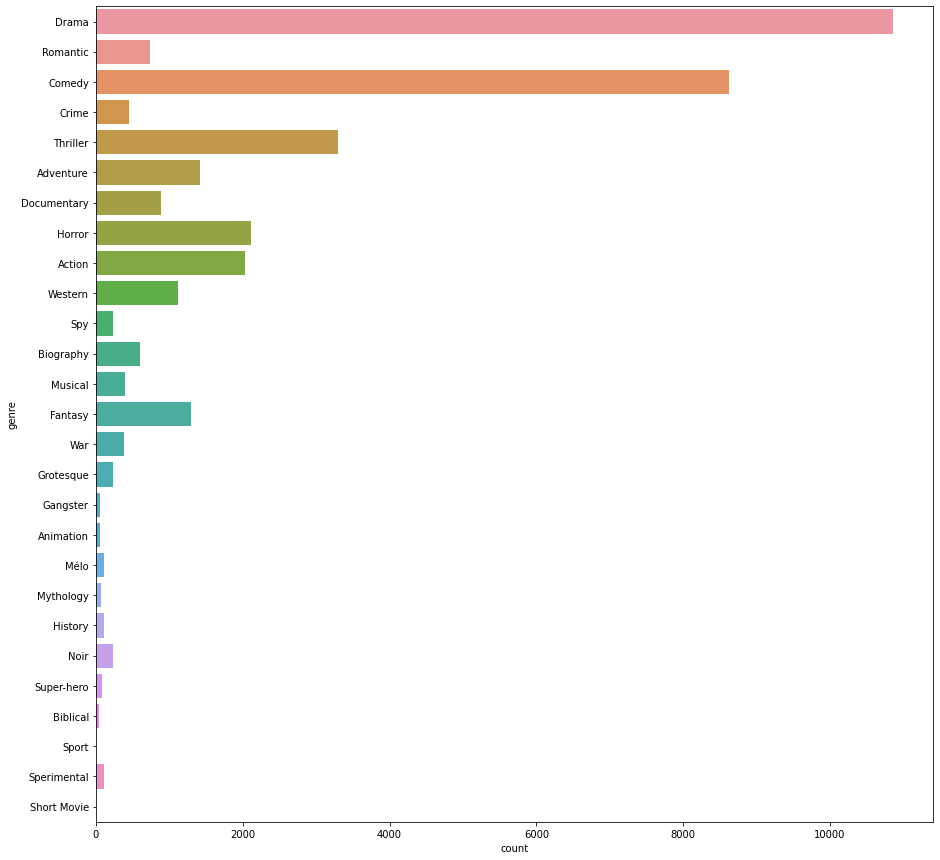

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(y=movie['genre'])
plt.show()

pada Gambar terlihat bahwa genre drama dan comedy merupakan genre yang sering ditonton dibanding genre yang lain.

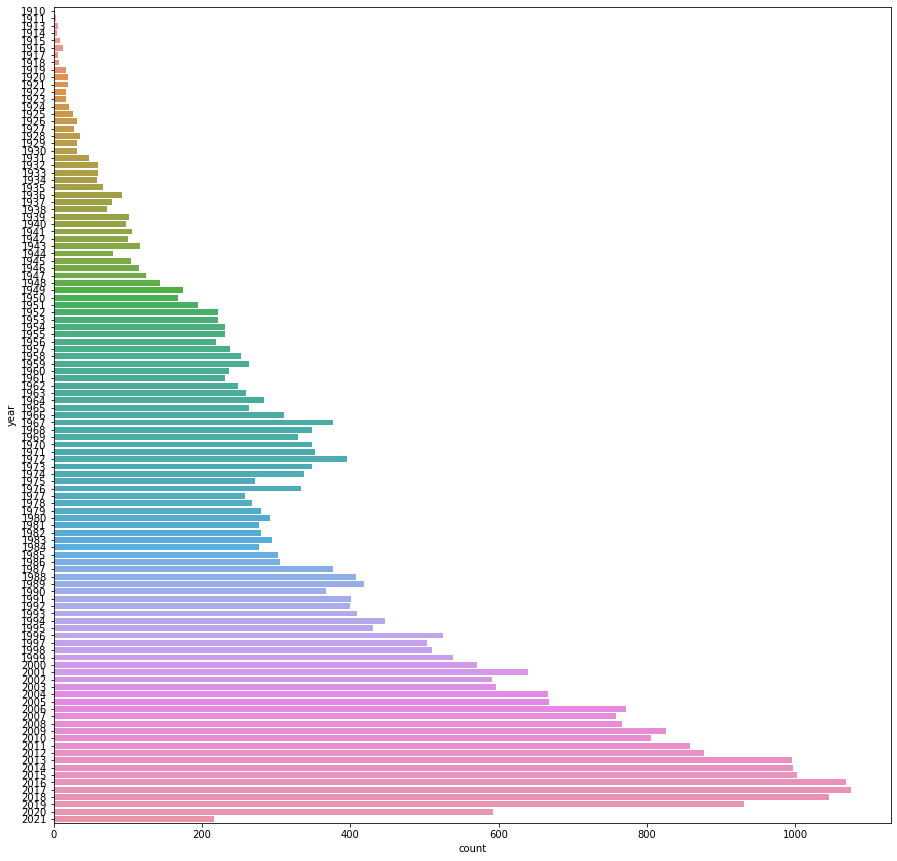

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(y=movie['year'])
plt.show()

pada Gambar terlihat bahwa semakin tahun produksi film semakin meningkat cukup pesat, dengan adanya teknologi khusus tahun demi tahun film menjadi bagian penting dalam peradaban.

In [21]:
movie.drop_duplicates(subset='title',inplace=True)

Drop semua title yang duplikast terhadap yang lain, sehingga data tidak ada yang duplikat

# Modelling

In [22]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(movie['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['action',
 'adventure',
 'animation',
 'biblical',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'gangster',
 'grotesque',
 'hero',
 'history',
 'horror',
 'movie',
 'musical',
 'mythology',
 'mélo',
 'noir',
 'romantic',
 'short',
 'sperimental',
 'sport',
 'spy',
 'super',
 'thriller',
 'war',
 'western']

In [23]:
# Melakukan fit lalu ditransformasikan ke dalam bentuk matrix
tfidf_matrix = tf.fit_transform(movie['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(34016, 29)

In [24]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=movie.title
).sample(22, axis=1).sample(10, axis=0)

,adventure,spy,crime,grotesque,sport,war,history,mythology,mélo,drama,hero,animation,super,short,fantasy,biblical,comedy,sperimental,documentary,thriller,horror,noir
title,,,,,,,,,,,,,,,,,,,,,,
Puzzle of a Downfall Child,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Hross i oss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
The Blob,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Costantino il grande,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Die Zweite Heimat - Chronik einer Jugend - Zwei fremde Augen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Nightmare Nanny,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Hannibal Rising,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Elena et les hommes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Kansas Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [27]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie['title'], columns=movie['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (34016, 34016)


title,The Greatest,Crime in the Street,Backmask,The Base II,Michael Jackson's Last Days: What Really Happened
title,,,,,
Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhs,0.0,0.0,0.0,0.0,0.0
Il marito è mio e l'ammazzo quando mi pare,0.0,0.0,0.0,0.0,0.0
Judas Kiss,0.0,0.0,0.0,0.0,0.0
The Big White,0.0,0.0,0.0,0.0,0.0
The Desperadoes,0.0,0.0,0.0,0.0,0.0
Love on the Air,0.0,0.0,0.0,0.0,0.0
Liebestraum,0.0,1.0,0.0,0.0,0.0
Cronaca di un amore,0.0,1.0,0.0,0.0,0.0
Raw Deal,0.0,0.0,0.0,1.0,0.0


In [28]:
def movie_recom(movie_name, similarity_data=cosine_sim_df, items=movie[['title', 'year', 'genre', 'year', 'public_vote']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar/tertinggi dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop title movie agar title yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Melakukan percobaa dengan memasukkan beberapa title movie dan mari kita lihat rekomendasi film yang diberikan sistem

In [29]:
movie[movie['title'] == 'Diner']

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,6.0,18,2,2,0,1,2


In [30]:
movie_recom('Diner')

,title,year,genre,year,public_vote
0,Malizia,1973,Comedy,1973,6.0
1,Crooklyn,1994,Comedy,1994,6.0
2,Tsisperi mtebi anu daujerebeli ambavi,1983,Comedy,1983,8.0
3,Manolesta,1981,Comedy,1981,6.0
4,Ternosecco,1986,Comedy,1986,5.0


In [31]:
movie[movie['title'] == 'Dead-Bang']

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
6,23,Dead-Bang,1989,Crime,109,United States,John Frankenheimer,"Don Johnson, Penelope Ann Miller, William Fors...",6.0,6.0,18,0,2,0,2,1


In [32]:
movie_recom('Dead-Bang')

,title,year,genre,year,public_vote
0,A Bullet for Joey,1955,Crime,1955,6.0
1,I Wake Up Screaming,1941,Crime,1941,8.0
2,Hunter: Back in Force,2003,Crime,2003,4.0
3,Tête de turc,2010,Crime,2010,6.0
4,Roma violenta,1975,Crime,1975,6.0


Dari beberapa contoh rekomendasi diatas, sistem memberikan kita reokmendasi dari film film yang berkaitan dengan genre user, dan berjalan dengan sangat baik.